### Configuration du notebook et importation des modules

In [2]:
import os
os.chdir('../')
os.getcwd()

'/Users/Cisco/Desktop/Master_Dauphine/M2_IEF/cours/semestre2/MachineLearning/projet'

In [3]:
import pickle
from datetime import datetime

import numpy as np
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

### Importation des données

In [4]:
data = pd.read_csv('data/cac40_v3.csv').drop('Unnamed: 0', axis=1)
data

,TICKER,annee,mois,jour,OP,UP,DO,CL,VO,RDMT_J,...,strategique,transaction,actionnaires,coentreprise,construction,collaboration,developpement,l_acquisition,participation,recommandation
0,AC,2007,10,1,50.8200,52.4500,50.7200,52.4400,939518,0.0456,...,0,0,0,0,0,0,0,0,0,0
1,AC,2007,10,10,57.6000,57.9000,56.4800,56.7400,1167710,0.0056,...,0,0,0,0,0,0,0,0,0,0
2,AC,2007,10,11,56.5700,57.9000,56.5700,57.0600,910369,-0.0053,...,0,0,0,0,0,0,0,0,0,0
3,AC,2007,10,12,57.1000,57.1000,55.5000,56.7600,996349,-0.0116,...,0,0,0,0,0,0,0,0,0,0
4,AC,2007,10,15,56.7600,57.2900,55.7700,56.1000,573647,-0.0032,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106537,VIV,2017,9,4,20.0650,20.2350,20.0300,20.1000,2250835,0.0027,...,0,0,0,0,0,0,0,0,0,0
106538,VIV,2017,9,5,20.0950,20.2900,19.9850,20.1550,3095238,-0.0020,...,0,0,0,0,0,0,0,0,0,0
106539,VIV,2017,9,6,20.0800,20.2100,20.0150,20.1150,2181925,-0.0065,...,0,0,0,0,0,0,0,0,0,0
106540,VIV,2017,9,7,20.1850,20.1850,19.9200,19.9850,4038684,-0.0023,...,0,0,0,0,0,0,0,0,0,0


# Exploration des données
***

### Question 1)

Q : Donner les charactéristiques de la base :
- Nombre de lignes
- Nombre de colonnes
- Format / Type de colonnes

In [5]:
print(f"Nombre de lignes : {data.shape[0]}")
print(f"Nombre de colonees : {data.shape[1]}")

Nombre de lignes : 106542
Nombre de colonees : 280


In [6]:
col_types = {}
for series_name, series in data.iteritems():
    col_types[series_name] = series.dtype
col_types = pd.DataFrame(col_types.values(),index=col_types.keys())
col_types.rename(axis='columns', mapper={0:'Type'}, inplace=True)

In [8]:
print(col_types)

                   Type
TICKER           object
annee             int64
mois              int64
jour              int64
OP              float64
...                 ...
collaboration     int64
developpement     int64
l_acquisition     int64
participation     int64
recommandation    int64

[280 rows x 1 columns]


### Question 2)

Q : Présenter quelques statistiques de la base.

<b>2. a. Variables quantitatives</b>

In [9]:
from helper_functions import numerical_description

> _2. a. i. Variables dépendentes_

In [10]:
variables_num_dep = ["RDMT_J", "RDMT_S", "RDMT_M"]
numeric_describe = numerical_description(variables_num_dep, data)

In [11]:
numeric_describe

,RDMT_J,RDMT_S,RDMT_M
count,"106,542.0000","106,542.0000","106,542.0000"
mean,0.0003,0.0015,0.0060
std,0.0219,0.0478,0.0959
min,-0.2624,-0.3753,-0.6000
25%,-0.0102,-0.0228,-0.0451
50%,0.0002,0.0018,0.0070
75%,0.0106,0.0256,0.0583
max,0.2632,0.5205,1.1347
Max min diff,0.5256,0.8958,1.7347


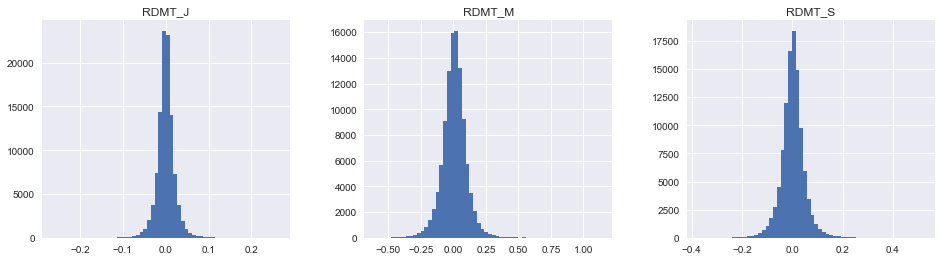

In [12]:
data[variables_num_dep].hist(bins=60, figsize=(16,4), layout=(1,3));

> _2. a. ii. Variables explicatives candidates_

In [13]:
variables_num_explic = ["OP", "UP", "DO", "CL", "VO"] + [f"{var}_{x}" for x in ["J", "S", "M"] for var in ["HISTO", "VOL", "UP", "DO"]]
numeric_describe = numerical_description(variables_num_explic, data)

In [14]:
numeric_describe

,OP,UP,DO,CL,VO,HISTO_J,VOL_J,UP_J,DO_J,HISTO_S,VOL_S,UP_S,DO_S,HISTO_M,VOL_M,UP_M,DO_M
count,"106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000"
mean,52.7514,53.3303,52.1291,52.7383,"2,697,386.7025",0.0003,"147,641.4109",0.0003,0.0003,0.0014,"250,007.6708",0.0013,0.0015,0.0056,"182,393.0719",0.0053,0.0057
std,41.9334,42.2790,41.5656,41.9329,"3,253,352.8790",0.0219,"48,191,262.0662",0.0193,0.0206,0.0478,"81,604,381.0431",0.0452,0.0481,0.0938,"59,534,437.3877",0.0912,0.0953
min,2.2400,2.2740,2.1200,2.1960,0.0000,-0.2624,-1.0000,-0.2956,-0.2753,-0.3753,-1.0000,-0.3442,-0.3882,-0.6084,-1.0000,-0.5790,-0.6045
25%,23.7000,24.0350,23.3150,23.6950,"693,341.2500",-0.0102,-0.2256,-0.0085,-0.0090,-0.0229,-0.2666,-0.0221,-0.0226,-0.0443,-0.3034,-0.0437,-0.0443
50%,42.0950,42.6000,41.5275,42.0650,"1,549,323.0000",0.0002,-0.0082,0.0000,0.0008,0.0017,-0.0061,0.0014,0.0021,0.0063,-0.0117,0.0061,0.0072
75%,67.2734,67.9900,66.5500,67.2500,"3,488,776.5000",0.0106,0.2789,0.0087,0.0098,0.0255,0.3542,0.0242,0.0258,0.0567,0.4169,0.0551,0.0576
max,394.9500,397.0000,391.0500,395.3500,"63,825,207.0000",0.2632,"15,729,999,999.0000",0.2880,0.2693,0.5205,"26,636,299,999.0000",0.4516,0.6227,1.0593,"19,432,499,999.0000",1.0490,1.0743
Max min diff,392.7100,394.7260,388.9300,393.1540,"63,825,207.0000",0.5256,"15,730,000,000.0000",0.5836,0.5445,0.8958,"26,636,300,000.0000",0.7958,1.0110,1.6678,"19,432,500,000.0000",1.6281,1.6789


**Conclusions**: Problème de qualité de données (**DQ Issue**) avec les volumes

> _2. a. iii. Corrélation dans les variables numériques_

In [16]:
numeric_variables = variables_num_dep + variables_num_explic
corr = data[numeric_variables].corr()

In [17]:
from helper_functions import plot_correlation_matrix

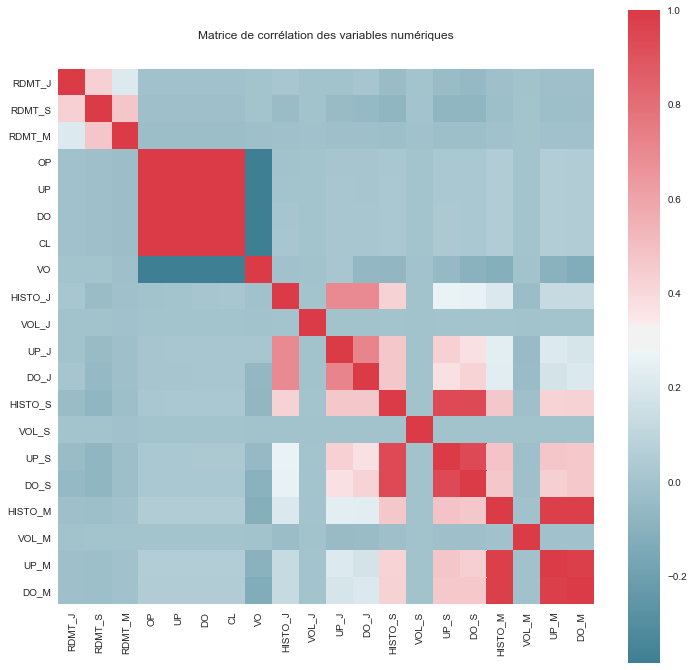

In [18]:
plot_correlation_matrix(corr, "Matrice de corrélation des variables numériques", 'seaborn')

**Conclusion** : On remarque que certaines variables devront être écartées car trop similaires, et que dans l'ensemble peu de variables numériques sont fortement corrélées avec les variables dépendantes que nous chercherons à expliquer.

<b>2. b. Variables catégoriques</b>

In [19]:
non_numeric_variables = data.columns[~data.columns.isin(numeric_variables)]
words = non_numeric_variables[4:]
descriptive_variables = non_numeric_variables[:4]

> _2. b. i. Variables descriptives_

------------- Tickers -------------

In [20]:
all_tickers = data.TICKER.unique()
print(f"Total de tickers distincts: {len(all_tickers)}")
print("Tickers:", all_tickers)

Total de tickers distincts: 40
Tickers: ['AC' 'ACA' 'AI' 'AIR' 'ATO' 'BN' 'BNP' 'CA' 'CAP' 'CS' 'DG' 'EI' 'EN'
 'ENGI' 'FP' 'FR' 'FTI' 'GLE' 'KER' 'LHN' 'LR' 'MC' 'ML' 'MT' 'OR' 'ORA'
 'PUB' 'RI' 'RNO' 'SAF' 'SAN' 'SGO' 'SOLB' 'STM' 'SU' 'SW' 'UG' 'UL' 'VIE'
 'VIV']


------------- Observation dates -------------

In [37]:
day_counts_by_ticker = data.groupby(["TICKER", "annee"])["jour"].count().unstack(level=0)
day_counts_by_ticker

TICKER,AC,ACA,AI,AIR,ATO,BN,BNP,CA,CAP,CS,...,SAN,SGO,SOLB,STM,SU,SW,UG,UL,VIE,VIV
annee,,,,,,,,,,,,,,,,,,,,,
2007,211.0000,211.0000,211.0000,211.0000,211.0000,211.0000,211.0000,211.0000,211.0000,211.0000,...,211.0000,211.0000,61.0000,211.0000,211.0000,211.0000,211.0000,211.0000,211.0000,211.0000
2008,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,...,256.0000,256.0000,189.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000
2009,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,...,256.0000,256.0000,151.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000
2010,258.0000,258.0000,258.0000,258.0000,258.0000,258.0000,258.0000,258.0000,258.0000,258.0000,...,258.0000,258.0000,142.0000,258.0000,258.0000,258.0000,258.0000,258.0000,258.0000,258.0000
2011,257.0000,257.0000,257.0000,257.0000,257.0000,257.0000,257.0000,257.0000,257.0000,257.0000,...,257.0000,257.0000,257.0000,257.0000,257.0000,257.0000,257.0000,257.0000,257.0000,257.0000
2012,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,...,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000
2013,255.0000,255.0000,255.0000,255.0000,255.0000,255.0000,255.0000,255.0000,255.0000,255.0000,...,255.0000,255.0000,255.0000,255.0000,255.0000,255.0000,255.0000,255.0000,255.0000,255.0000
2014,255.0000,255.0000,255.0000,255.0000,255.0000,255.0000,255.0000,255.0000,255.0000,255.0000,...,255.0000,255.0000,255.0000,255.0000,255.0000,255.0000,255.0000,255.0000,255.0000,255.0000
2015,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,...,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000,256.0000


In [38]:
day_counts_by_ticker.transpose().describe()

annee,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,39.0000,39.0000,39.0000,39.0000,39.0000,39.0000,39.0000,39.0000,40.0000,40.0000,40.0000
mean,207.1538,254.2821,253.3077,255.0256,257.0000,256.0000,255.0000,255.0000,251.6250,257.0000,211.9750
std,24.0192,10.7286,16.8135,18.5749,0.0000,0.0000,0.0000,0.0000,27.6699,0.0000,0.1581
min,61.0000,189.0000,151.0000,142.0000,257.0000,256.0000,255.0000,255.0000,81.0000,257.0000,211.0000
25%,211.0000,256.0000,256.0000,258.0000,257.0000,256.0000,255.0000,255.0000,256.0000,257.0000,212.0000
50%,211.0000,256.0000,256.0000,258.0000,257.0000,256.0000,255.0000,255.0000,256.0000,257.0000,212.0000
75%,211.0000,256.0000,256.0000,258.0000,257.0000,256.0000,255.0000,255.0000,256.0000,257.0000,212.0000
max,211.0000,256.0000,256.0000,258.0000,257.0000,256.0000,255.0000,255.0000,256.0000,257.0000,212.0000


**Conclusion**: Possibilité de DQ Issue dans les apparitions par ticker. 

In [53]:
standard_observations_in_year = {year:day_counts_by_ticker.loc[year].value_counts().index[0] for year in day_counts_by_ticker.index}

In [54]:
standard_observations_in_year

{2007: 211.0,
 2008: 256.0,
 2009: 256.0,
 2010: 258.0,
 2011: 257.0,
 2012: 256.0,
 2013: 255.0,
 2014: 255.0,
 2015: 256.0,
 2016: 257.0,
 2017: 212.0}

In [59]:
observation_counts_in_year = {year:day_counts_by_ticker.loc[year].unique() for year in day_counts_by_ticker.index}
observation_counts_in_year

{2007: array([211.,  nan,  61.]),
 2008: array([256.,  nan, 189.]),
 2009: array([256.,  nan, 151.]),
 2010: array([258.,  nan, 142.]),
 2011: array([257.,  nan]),
 2012: array([256.,  nan]),
 2013: array([255.,  nan]),
 2014: array([255.,  nan]),
 2015: array([256.,  81.]),
 2016: array([257.]),
 2017: array([212., 211.])}

In [67]:
ticker_lifetimes = {ticker:(data.loc[data["TICKER"]==ticker,"annee"].min(), data.loc[data["TICKER"]==ticker,"annee"].max()) for ticker in all_tickers}
ticker_lifetimes

{'AC': (2007, 2017),
 'ACA': (2007, 2017),
 'AI': (2007, 2017),
 'AIR': (2007, 2017),
 'ATO': (2007, 2017),
 'BN': (2007, 2017),
 'BNP': (2007, 2017),
 'CA': (2007, 2017),
 'CAP': (2007, 2017),
 'CS': (2007, 2017),
 'DG': (2007, 2017),
 'EI': (2007, 2017),
 'EN': (2007, 2017),
 'ENGI': (2007, 2017),
 'FP': (2007, 2017),
 'FR': (2007, 2017),
 'FTI': (2007, 2017),
 'GLE': (2007, 2017),
 'KER': (2007, 2017),
 'LHN': (2015, 2017),
 'LR': (2007, 2017),
 'MC': (2007, 2017),
 'ML': (2007, 2017),
 'MT': (2007, 2017),
 'OR': (2007, 2017),
 'ORA': (2007, 2017),
 'PUB': (2007, 2017),
 'RI': (2007, 2017),
 'RNO': (2007, 2017),
 'SAF': (2007, 2017),
 'SAN': (2007, 2017),
 'SGO': (2007, 2017),
 'SOLB': (2007, 2017),
 'STM': (2007, 2017),
 'SU': (2007, 2017),
 'SW': (2007, 2017),
 'UG': (2007, 2017),
 'UL': (2007, 2017),
 'VIE': (2007, 2017),
 'VIV': (2007, 2017)}

In [81]:
dead_tickers = [k for (k,v) in ticker_lifetimes.items() if v[1]!=data["annee"].max()]
print(dead_tickers)
late_tickers = [k for (k,v) in ticker_lifetimes.items() if v[0]!=data["annee"].min()]
print(late_tickers)

[]
['LHN']


In [82]:
data.loc[data["TICKER"].isin(late_tickers)].shape

(550, 280)

In [98]:
std_obs = pd.Series(standard_observations_in_year)
std_obs.name = "Standard"
tmp = day_counts_by_ticker.merge(std_obs, left_index=True, right_index=True)
non_standard_mask = tmp.apply(lambda x: x != x["Standard"], axis=1)

In [114]:
day_counts_by_ticker.loc[:,(day_counts_by_ticker[non_standard_mask].sum() != 0)].merge(std_obs, right_index=True, left_index=True)

,FTI,LHN,SOLB,Standard
annee,,,,
2007,211.0000,nan,61.0000,211.0000
2008,256.0000,nan,189.0000,256.0000
2009,256.0000,nan,151.0000,256.0000
2010,258.0000,nan,142.0000,258.0000
2011,257.0000,nan,257.0000,257.0000
2012,256.0000,nan,256.0000,256.0000
2013,255.0000,nan,255.0000,255.0000
2014,255.0000,nan,255.0000,255.0000
2015,256.0000,81.0000,256.0000,256.0000


**Conclusion**: Peut-être écarter SOLB et LHN en entraînement

> _2. b. ii. Variables mots_

In [24]:
word_data = data[words.to_list()]

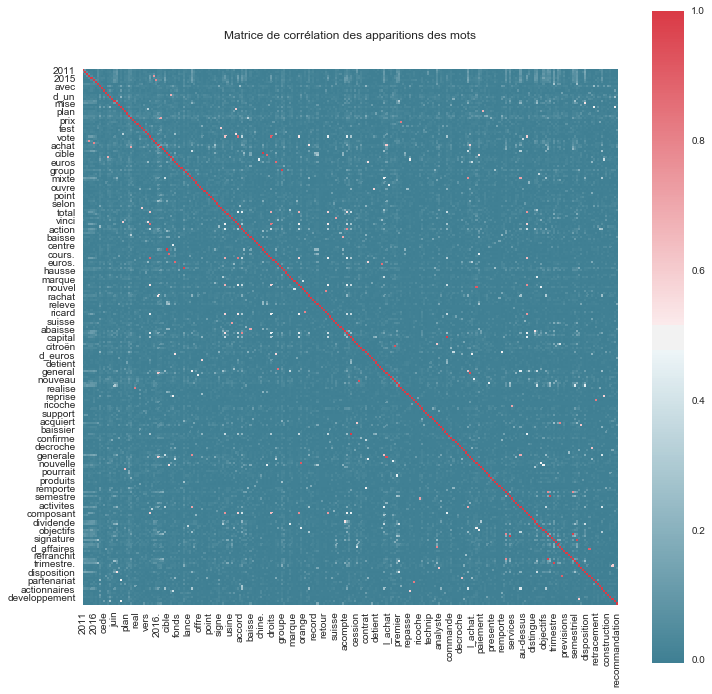

In [25]:
plot_correlation_matrix(word_data.corr(), "Matrice de corrélation des apparitions des mots", 'seaborn')

**Conclusion**: On peut déjà remarquer que certains mots seront à écarter faute d'être trop similaires (points rouges en dehors de la diagonale).

In [26]:
total_appearances = word_data.sum()

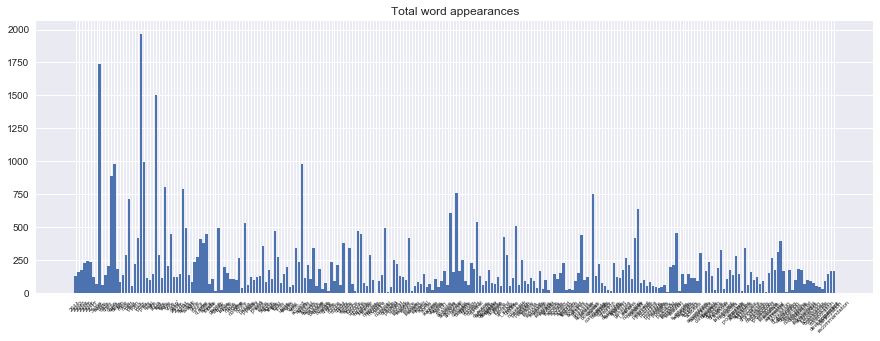

In [27]:
fig = plt.figure(figsize=(15,5))
plt.bar(total_appearances.index, total_appearances)
plt.xticks(range(len(total_appearances.index)), total_appearances.index, fontsize='xx-small', rotation=45)
plt.title("Total word appearances");

**Conclusion**: Certains mots seront à écarter faute d'être trop peu apparus.

**2. c. Statistiques globales**

In [160]:
data.isna().sum().sum()

0

**Conclusion**: Pas de valeur NaN dans la base

### Conclusions préliminaires:
- 1) Le ticker LHN est apparu plus tard dans la base que les autres.
- 2) Le ticker SOLB a un nombre non standard d'apparitions pour les années 2007-2010.
- 3) Les données liées au volume sont contestables (présence d'outliers)

### Exploration des outliers liés au volume

In [226]:
from datetime import datetime

volume_data = data[["annee", "mois", "jour", "TICKER", "CL", "VO"] + [f"VOL_{x}" for x in ["J", "S", "M"]]].copy()

def pad(x):
    if x < 10:
        return f"0{x}"
    else:
        return str(x)

def get_date(x):
    return datetime.strptime(f"{pad(x['annee'])}/{pad(x['mois'])}/{pad(x['jour'])}", "%Y/%m/%d")

volume_data["date"] = volume_data.apply(get_date, 1)

In [227]:
volume_data

,annee,mois,jour,TICKER,CL,VO,VOL_J,VOL_S,VOL_M,date
0,2007,10,1,AC,52.4400,939518,-0.2057,-0.0117,-0.5061,2007-10-01
1,2007,10,10,AC,56.7400,1167710,0.1264,0.4853,-0.2252,2007-10-10
2,2007,10,11,AC,57.0600,910369,-0.2204,0.0251,-0.0368,2007-10-11
3,2007,10,12,AC,56.7600,996349,0.0944,-0.0981,-0.1132,2007-10-12
4,2007,10,15,AC,56.1000,573647,-0.4243,-0.4250,-0.5719,2007-10-15
...,...,...,...,...,...,...,...,...,...,...
106537,2017,9,4,VIV,20.1000,2250835,-0.7370,-0.3434,-0.0553,2017-09-04
106538,2017,9,5,VIV,20.1550,3095238,0.3752,-0.3327,0.3433,2017-09-05
106539,2017,9,6,VIV,20.1150,2181925,-0.2951,-0.5804,-0.1743,2017-09-06
106540,2017,9,7,VIV,19.9850,4038684,0.8510,0.0716,1.0076,2017-09-07


In [228]:
volume_data.describe()

,annee,mois,jour,CL,VO,VOL_J,VOL_S,VOL_M
count,"106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000","106,542.0000"
mean,"2,012.0369",6.5381,15.7781,52.7383,"2,697,386.7025","147,641.4109","250,007.6708","182,393.0719"
std,3.0881,3.3738,8.7397,41.9329,"3,253,352.8790","48,191,262.0662","81,604,381.0431","59,534,437.3877"
min,"2,007.0000",1.0000,1.0000,2.1960,0.0000,-1.0000,-1.0000,-1.0000
25%,"2,009.0000",4.0000,8.0000,23.6950,"693,341.2500",-0.2256,-0.2666,-0.3034
50%,"2,012.0000",7.0000,16.0000,42.0650,"1,549,323.0000",-0.0082,-0.0061,-0.0117
75%,"2,015.0000",9.0000,23.0000,67.2500,"3,488,776.5000",0.2789,0.3542,0.4169
max,"2,017.0000",12.0000,31.0000,395.3500,"63,825,207.0000","15,729,999,999.0000","26,636,299,999.0000","19,432,499,999.0000"


In [229]:
from scipy import stats
mask = np.where(abs(stats.zscore(volume_data.iloc[:, 4:-1])) > 3)

In [230]:
concerned_tickers = volume_data.loc[mask[0], "TICKER"].unique()
concerned_tickers

array(['ACA', 'AIR', 'BN', 'BNP', 'CA', 'CS', 'DG', 'ENGI', 'FP', 'FR',
       'FTI', 'GLE', 'KER', 'MC', 'MT', 'OR', 'ORA', 'SAF', 'SAN', 'SGO',
       'SOLB', 'STM', 'SU', 'UG', 'UL', 'VIE', 'VIV'], dtype=object)

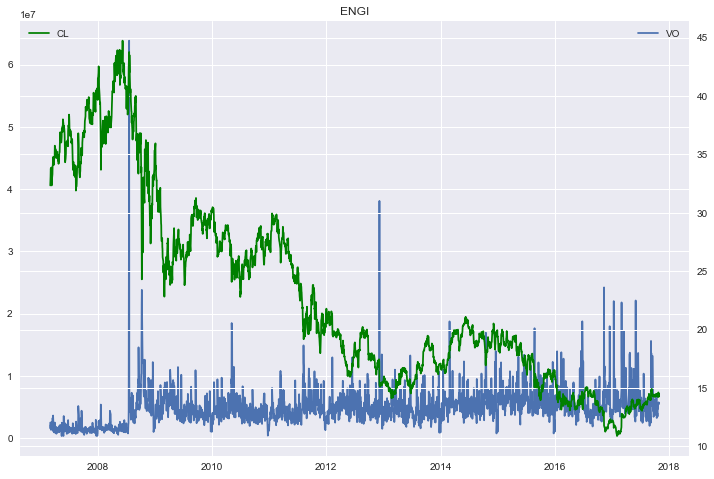

In [231]:
def plot_vol_vs_cl(data:pd.DataFrame, ticker:str):
    plot_data = volume_data.loc[volume_data["TICKER"]==ticker].sort_values(by="date")
    fig, ax = plt.subplots(1, figsize=(12,8))
    ax.plot(plot_data["date"], plot_data["VO"], label='VO')
    ax.legend(loc=0)
    ax2 = ax.twinx()
    ax2.plot(plot_data["date"], plot_data["CL"], color='green', label='CL')
    ax2.legend(loc=2)
    plt.title(ticker);
    
plot_vol_vs_cl(volume_data, "ENGI")

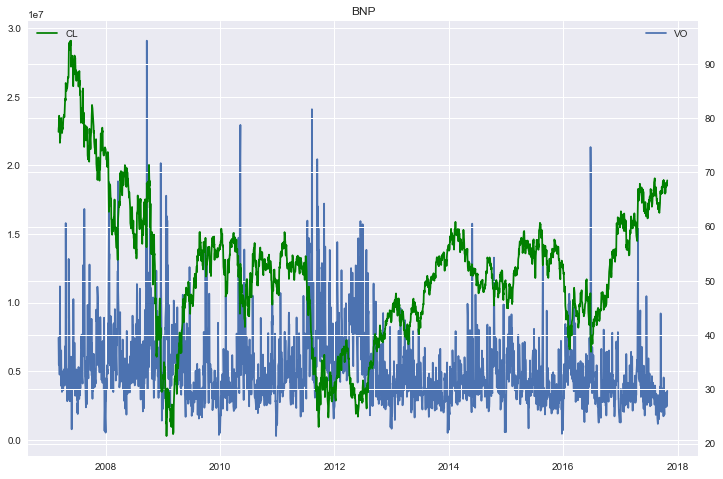

In [232]:
plot_vol_vs_cl(volume_data, "BNP")

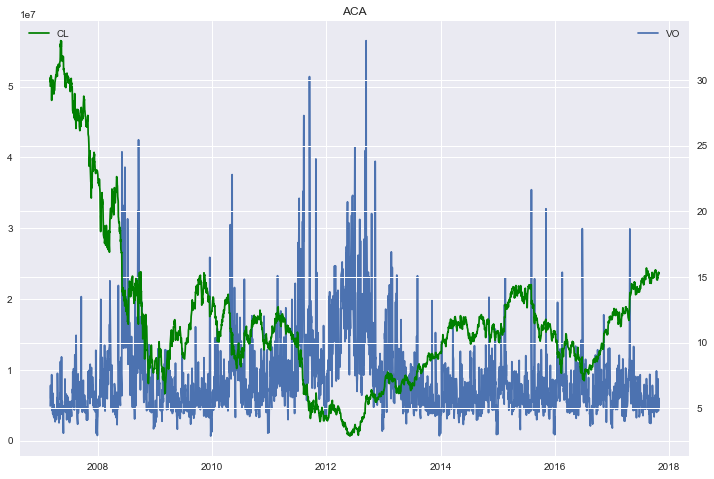

In [233]:
plot_vol_vs_cl(volume_data, "ACA")

#### **CONCLUSION**: Outliers in VO related features should be treated

In [234]:
all_outliers = volume_data.iloc[mask[0],:]

In [235]:
all_outliers

,annee,mois,jour,TICKER,CL,VO,VOL_J,VOL_S,VOL_M,date
2783,2007,12,21,ACA,23.0700,12751048,1.6210,1.6964,0.3542,2007-12-21
2903,2007,8,17,ACA,27.2800,14870636,0.7863,0.7191,2.7090,2007-08-17
2927,2007,9,19,ACA,27.9000,20332035,1.0778,3.4121,3.1828,2007-09-19
2948,2008,1,21,ACA,18.4500,14914364,0.2884,2.0415,1.1943,2008-01-21
2949,2008,1,22,ACA,19.6700,19944799,0.3373,3.1084,2.5516,2008-01-22
...,...,...,...,...,...,...,...,...,...,...
106131,2016,11,30,VIV,17.9900,13209740,2.6208,1.4686,4.0134,2016-11-30
106141,2016,12,16,VIV,18.1800,13552785,2.1950,0.5639,2.3340,2016-12-16
106254,2016,6,24,VIV,15.5950,19667541,1.9243,1.4997,2.5770,2016-06-24
106313,2016,9,16,VIV,17.1050,15673885,2.6460,4.3720,8.2592,2016-09-16


&rarr; 4048 rows of outliers compared to +10000 rows of data, will remove

In [263]:
from exploratory_notebooks.helper_functions import remove_outliers

remove_outliers(data, ["VO"] + [f"VOL_{x}" for x in ["J", "S", "M"]])

,TICKER,annee,mois,jour,OP,UP,DO,CL,VO,RDMT_J,...,strategique,transaction,actionnaires,coentreprise,construction,collaboration,developpement,l_acquisition,participation,recommandation
0,AC,2007,10,1,50.8200,52.4500,50.7200,52.4400,939518,0.0456,...,0,0,0,0,0,0,0,0,0,0
1,AC,2007,10,10,57.6000,57.9000,56.4800,56.7400,1167710,0.0056,...,0,0,0,0,0,0,0,0,0,0
2,AC,2007,10,11,56.5700,57.9000,56.5700,57.0600,910369,-0.0053,...,0,0,0,0,0,0,0,0,0,0
3,AC,2007,10,12,57.1000,57.1000,55.5000,56.7600,996349,-0.0116,...,0,0,0,0,0,0,0,0,0,0
4,AC,2007,10,15,56.7600,57.2900,55.7700,56.1000,573647,-0.0032,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106537,VIV,2017,9,4,20.0650,20.2350,20.0300,20.1000,2250835,0.0027,...,0,0,0,0,0,0,0,0,0,0
106538,VIV,2017,9,5,20.0950,20.2900,19.9850,20.1550,3095238,-0.0020,...,0,0,0,0,0,0,0,0,0,0
106539,VIV,2017,9,6,20.0800,20.2100,20.0150,20.1150,2181925,-0.0065,...,0,0,0,0,0,0,0,0,0,0
106540,VIV,2017,9,7,20.1850,20.1850,19.9200,19.9850,4038684,-0.0023,...,0,0,0,0,0,0,0,0,0,0
